In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!curl -L "https://www.dropbox.com/s/5msc5ix7ndyba10/Train_rev1.csv.tar.gz?dl=1" -o Train_rev1.csv.tar.gz
!tar -xvf Train_rev1.csv.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    66    0    66    0     0    174      0 --:--:-- --:--:-- --:--:--   174
100   299  100   299    0     0    353      0 --:--:-- --:--:-- --:--:--   353
100  119M  100  119M    0     0  14.2M      0  0:00:08  0:00:08 --:--:-- 22.6M
Train_rev1.csv


In [3]:
data = pd.read_csv("./Train_rev1.csv", index_col=None)

In [4]:
data.shape

(244768, 12)

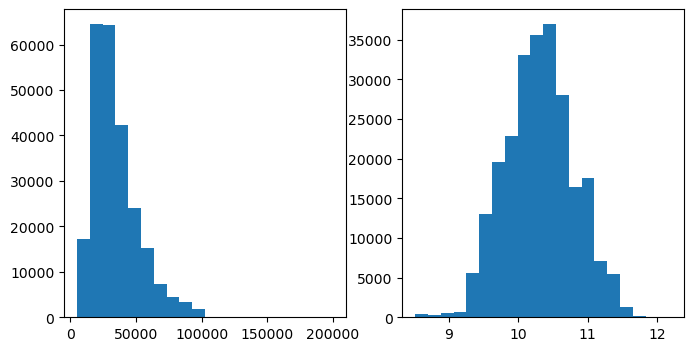

In [5]:
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')
plt.figure(figsize=[8,4])

plt.subplot(1, 2, 1)
plt.hist(data['SalaryNormalized'], bins=20)

plt.subplot(1, 2, 2)
plt.hist(data['Log1pSalary'], bins=20);

In [6]:
text_columns = ["Title", "FullDescription"]
categorical_columns = ["Category", "Company", "LocationNormalized", "ContractType", "ContractTime"]
target_column = "Log1pSalary"

In [7]:
data[categorical_columns] = data[categorical_columns].fillna('NaN')

In [8]:
data.sample(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
196420,71815565,Contract/Service Manager (HVAC M E),Contract Manager HVAC and M s s Quoting for W...,"Slough, London",London,NaN,permanent,Richmond Associates,Engineering Jobs,36000 - 40000/annum +Car+Holiday s+Package,38000,cv-library.co.uk,10.545368
147282,70757538,Senior PR Manager Consumer Electronics / Tech...,Our client is one of the world's leading consu...,London,London,full_time,permanent,PR Moves,"PR, Advertising & Marketing Jobs",65000 - 75000 per annum + benefits,70000,PR Week Jobs,11.156265
183190,71623121,ISO27001 Lead Auditor/Implementer ****k plus ...,Leading Information Security Consultancy now ...,City of London - London,The City,full_time,permanent,UKStaffsearch,Accounting & Finance Jobs,45000 - 50000,47500,ukstaffsearch.com,10.768506


In [9]:
print("Raw text")
print(data["FullDescription"][2::100000])

Raw text
2         Mathematical Modeller / Simulation Analyst / O...
100002    A successful and high achieving specialist sch...
200002    Web Designer  HTML, CSS, JavaScript, Photoshop...
Name: FullDescription, dtype: object


In [10]:
import nltk
tokenizer = nltk.tokenize.WordPunctTokenizer()


def normalize(text):
    text = str(text).lower()
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)
    
    
    
data[text_columns] = data[text_columns].applymap(normalize)

In [11]:
data[text_columns]

,Title,FullDescription
0,engineering systems analyst,engineering systems analyst dorking surrey sal...
1,stress engineer glasgow,stress engineer glasgow salary **** to **** we...
2,modelling and simulation analyst,mathematical modeller / simulation analyst / o...
3,engineering systems analyst / mathematical mod...,engineering systems analyst / mathematical mod...
4,"pioneer , miser engineering systems analyst","pioneer , miser engineering systems analyst do..."
...,...,...
244763,teacher of science,position : qualified teacher subject / special...
244764,teacher of business studies and ict,position : qualified teacher or nqt subject / ...
244765,english teacher,position : qualified teacher subject / special...
244766,supply teachers,position : qualified teacher subject / special...


In [12]:
print("Tokenized")
print(data["FullDescription"][2::100000])

Tokenized
2         mathematical modeller / simulation analyst / o...
100002    a successful and high achieving specialist sch...
200002    web designer html , css , javascript , photosh...
Name: FullDescription, dtype: object


In [13]:
from collections import Counter
from tqdm import tqdm

token_counts = Counter()

In [14]:
%%time
for _, row in data[text_columns].iterrows():
    for text in row:
        token_counts.update(text.split(' '))

CPU times: user 21.7 s, sys: 19.3 ms, total: 21.7 s
Wall time: 21.7 s


In [15]:
token_counts2 = Counter()

In [16]:
%%time
for row in data[text_columns].values.flatten():
    token_counts2.update(row.split(' '))

CPU times: user 10.7 s, sys: 15.9 ms, total: 10.7 s
Wall time: 10.7 s


In [17]:
token_counts2

Counter({'and': 2657388,
         '.': 2523216,
         ',': 2318606,
         'the': 2080994,
         'to': 2019884,
         'a': 1521925,
         'of': 1426213,
         'in': 1035792,
         'for': 867233,
         'with': 728884,
         'you': 694177,
         '****': 681869,
         'will': 652403,
         'be': 625163,
         'is': 599665,
         '/': 554003,
         'this': 497002,
         'as': 472859,
         'an': 442713,
         'experience': 429019,
         'are': 428534,
         ':': 415648,
         'on': 394777,
         'have': 361514,
         'or': 329512,
         'role': 292680,
         'work': 280280,
         'business': 275975,
         'your': 275371,
         'team': 271843,
         'we': 238825,
         'skills': 236248,
         'manager': 235225,
         '(': 234419,
         'sales': 229086,
         'our': 223441,
         'working': 222783,
         'within': 217418,
         'all': 216046,
         'that': 200655,
         'client

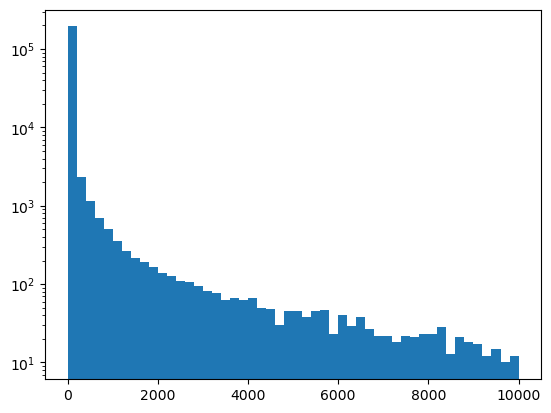

In [18]:
plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True);

In [19]:
min_count = 10

tokens = [token for token, counts in token_counts.items() if counts >= min_count]

In [20]:
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + sorted(tokens)

token_to_id = {token: idx for idx, token in enumerate(tokens)}

In [21]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

In [22]:
def as_matrix(sequences, max_len=None):
    """Convert a list of tokens into a matrix with padding 
    """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i, seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
        
    return matrix

In [23]:
print('Lines')
print('\n'.join(data["Title"][::100000].values), end='\n\n')
print("Matrix:")
print(as_matrix(data["Title"][::100000]))

Lines
engineering systems analyst
hr assistant
senior ec & i engineer

Matrix:
[[10807 30161  2166     1     1]
 [15020  2844     1     1     1]
 [27645 10201    16 15215 10804]]


In [24]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
top_companies, top_counts = zip(*Counter(data['Company']).most_common(1000))
recognized_companies = set(top_companies)
data["Company"] = data["Company"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))


DictVectorizer(dtype=<class 'numpy.float32'>, sparse=False)

In [26]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
data_train.index = range(len(data_train))
data_val.index = range(len(data_val))

print("train_size =", len(data_train))
print("Validation size =", len(data_val))

train_size = 195814
Validation size = 48954


In [27]:
def make_batch(data, max_len=None, word_dropout=0):
    
    batch = {}
    batch["Title"] = as_matrix(data["Title"].values, max_len)
    batch["FullDescription"] = as_matrix(data["FullDescription"].values, max_len)
    batch["Categorical"] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if word_dropout != 0:
        batch["FullDesription"] = apply_word_dropout(batch["FullDesription"], 1. - word_dropout)
        
    if target_column in data.columns:
        batch[target_column] = data[target_column].values
        
    return batch

def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

In [28]:
a = make_batch(data_train[:3], max_len=10)
a

{'Title': array([[27645, 29893, 33674,     1,     1,     1,     1],
        [29239,   197, 19175, 20042, 15554, 23162,  4051],
        [10609, 30412, 17746,    33,  8705, 29157,    65]], dtype=int32),
 'FullDescription': array([[27645, 29893, 33674, 32939,   982, 27645, 29893, 33674, 16451,
         32939],
        [29239,   197, 19175, 20042, 15554, 23162,  4051, 25511,   907,
            82],
        [30746, 21956, 20601,  6409, 16451,  8165, 27493,   982, 30412,
         17746]], dtype=int32),
 'Categorical': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'Log1pSalary': array([ 9.71154 , 10.463132, 10.71444 ], dtype=float32)}

In [29]:
data_train[:3]['Title'].values

array(['senior support worker',
       'statistical / mathematical modeller in pharmaceutical biosciences',
       'emc team leader ( def stan )'], dtype=object)

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class Reorder(nn.Module):
    def forward(self, input):
        return input.permute((0, 2, 1))

In [32]:
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, **kwargs):
    """iterates minibatches of data in random order"""
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)
        
        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start: start + batch_size]], **kwargs)
            target = batch.pop(target_column)
            yield batch, target
            
        if not cycle: break

In [33]:
iterator = iterate_minibatches(data_train, 3)
batch, target = next(iterator)

In [34]:
n_tokens = len(tokens)
n_cat_features = len(categorical_vectorizer.vocabulary_)
hid_size = 64
n_maximums = 2

simple_model = nn.Sequential()


simple_model.add_module('emb', nn.Embedding(num_embeddings=n_tokens, embedding_dim=hid_size))
simple_model.add_module('reorder', Reorder())
simple_model.add_module('conv1', nn.Conv1d(
    in_channels= hid_size,
    out_channels = 2 * hid_size,
    kernel_size = 3
     
))
simple_model.add_module('relu1', nn.ReLU())
simple_model.add_module('conv2', nn.Conv1d(
    in_channels= 2 * hid_size,
    out_channels = 2 * hid_size,
    kernel_size = 3
     
))
simple_model.add_module('relu2', nn.ReLU())
simple_model.add_module('bn1', nn.BatchNorm1d(hid_size*2))

simple_model.add_module('adaptive_pool', nn.AdaptiveMaxPool1d(n_maximums))
simple_model.add_module('flatten', nn.Flatten())
simple_model.add_module('Linear_out', nn.Linear(hid_size * 2 * n_maximums, 1))

In [35]:
simple_model

Sequential(
  (emb): Embedding(34158, 64)
  (reorder): Reorder()
  (conv1): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (relu1): ReLU()
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu2): ReLU()
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveMaxPool1d(output_size=2)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear_out): Linear(in_features=256, out_features=1, bias=True)
)

In [37]:
b = simple_model(torch.tensor(batch['FullDescription']).type(torch.LongTensor))

In [38]:
b.shape

torch.Size([3, 1])

In [39]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [40]:
from IPython.display import clear_output

In [41]:
simple_model.to(device)

Sequential(
  (emb): Embedding(34158, 64)
  (reorder): Reorder()
  (conv1): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (relu1): ReLU()
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu2): ReLU()
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveMaxPool1d(output_size=2)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear_out): Linear(in_features=256, out_features=1, bias=True)
)

In [67]:
from tqdm import tqdm

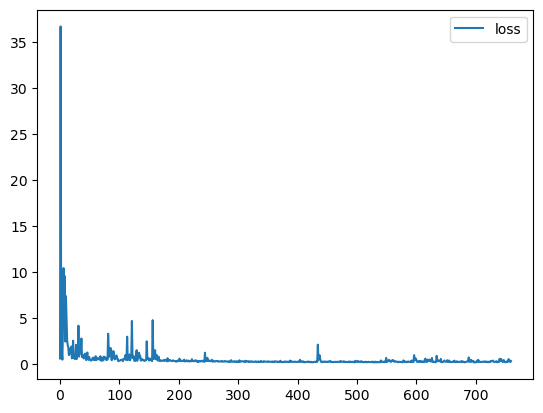

/home/arsen/anaconda3/envs/my_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


In [79]:
model = simple_model
opt = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss()

history = []
epochs = 1

for epoch_num in range(epochs):
    for idx, (batch, target) in enumerate(iterate_minibatches(data_train)):
        batch = torch.tensor(batch["FullDescription"], dtype=torch.long).to(device)
        target = torch.tensor(target).to(device)
        
        predictions = model(batch)
        predictions = predictions.view(predictions.size(0))
        
        loss = loss_func(predictions, target)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        history.append(loss.item())
        
        
        if (idx + 1) % 10 == 0:
            clear_output(True)
            plt.plot(history, label='loss')
            plt.legend()
            plt.show()

In [80]:
model.to('cpu')

Sequential(
  (emb): Embedding(34158, 64)
  (reorder): Reorder()
  (conv1): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (relu1): ReLU()
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu2): ReLU()
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveMaxPool1d(output_size=2)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear_out): Linear(in_features=256, out_features=1, bias=True)
)

In [82]:
batch_size = 256

In [92]:
def print_metrics(model, data, batch_size=batch_size, name='', **kw):
    squared_error = abs_error = num_samples = 0.0
    for batch_x, batch_y in tqdm(iterate_minibatches(data, batch_size=batch_size, shuffle=False, **kw)):
        batch = torch.tensor(batch_x["FullDescription"], dtype=torch.long)
        batch_pred = simple_model(batch)[:, 0].detach().cpu().numpy()
        squared_error += np.sum(np.square(batch_pred - batch_y))
        abs_error += np.sum(np.abs(batch_pred - batch_y))
        num_samples += len(batch_y)
    print("MSE", squared_error / num_samples)
    print("MAE", abs_error / num_samples)
    
print_metrics(simple_model, data_train, name='Train')
print_metrics(simple_model, data_val, name="Val")

765it [05:06,  2.50it/s]


MSE 0.2241682460958334
MAE 0.3624243807130058


192it [01:25,  2.25it/s]

MSE 0.22365884628542138
MAE 0.3618516679263443


In [87]:
np.exp(0.2241682460958334)

1.251281524950861

In [91]:
simple_model.cpu()

Sequential(
  (emb): Embedding(34158, 64)
  (reorder): Reorder()
  (conv1): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (relu1): ReLU()
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu2): ReLU()
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveMaxPool1d(output_size=2)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear_out): Linear(in_features=256, out_features=1, bias=True)
)